In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

commbytes = [8,16,32,64,128,256]
threadcnts = [64] + [x*256 for x in range(1,17)]

In [2]:
datasets = []
for commbyte in commbytes: 
    dataset = []
    for threadcnt in threadcnts:
        p = subprocess.run([f"./build/tCommTest{commbyte}", str(threadcnt)], capture_output=True)
        print(p.stderr.decode('utf-8'))
        dataset.append(float(p.stdout.decode('utf-8')[:-1]))
    datasets.append(dataset)

with open("datasets.txt", 'w') as f:
    f.write(str(datasets))
    f.write("\n")

# threads: 64
# comm bytes: 8

# threads: 256
# comm bytes: 8

# threads: 512
# comm bytes: 8

# threads: 768
# comm bytes: 8

# threads: 1024
# comm bytes: 8

# threads: 1280
# comm bytes: 8

# threads: 1536
# comm bytes: 8

# threads: 1792
# comm bytes: 8

# threads: 2048
# comm bytes: 8

# threads: 2304
# comm bytes: 8

# threads: 2560
# comm bytes: 8

# threads: 2816
# comm bytes: 8

# threads: 3072
# comm bytes: 8

# threads: 3328
# comm bytes: 8

# threads: 3584
# comm bytes: 8

# threads: 3840
# comm bytes: 8

# threads: 4096
# comm bytes: 8

# threads: 64
# comm bytes: 16

# threads: 256
# comm bytes: 16

# threads: 512
# comm bytes: 16

# threads: 768
# comm bytes: 16

# threads: 1024
# comm bytes: 16

# threads: 1280
# comm bytes: 16

# threads: 1536
# comm bytes: 16

# threads: 1792
# comm bytes: 16

# threads: 2048
# comm bytes: 16

# threads: 2304
# comm bytes: 16

# threads: 2560
# comm bytes: 16

# threads: 2816
# comm bytes: 16

# threads: 3072
# comm bytes: 16

# threa

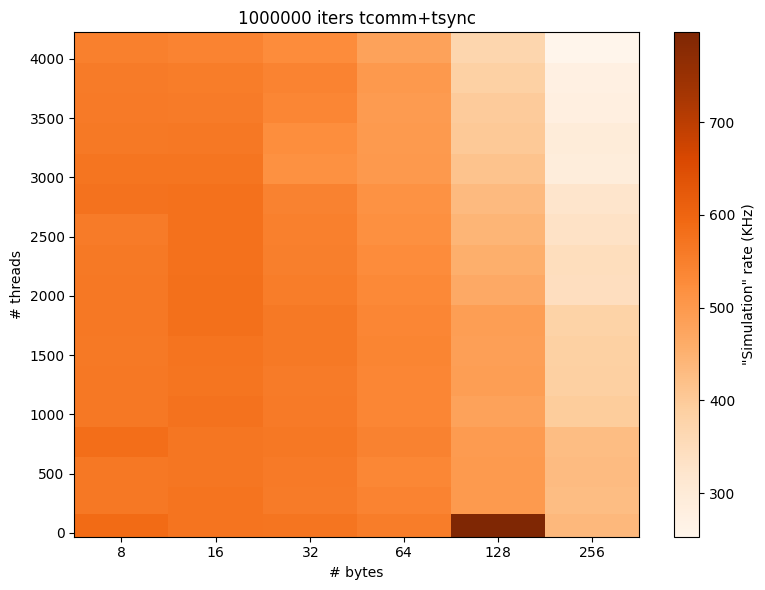

In [3]:
commbytes = [int(np.log2(cb)) for cb in commbytes]
X, Y = np.meshgrid(commbytes, threadcnts)
Z = 1e6 / np.transpose(np.array(datasets))

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Create the heatmap with pcolormesh
heatmap = ax.pcolormesh(X, Y, Z, shading='nearest', cmap="Oranges")

xticks = commbytes  # Positions of ticks (same as your data points)
xtick_labels = [f"${{{1<<x}}}$" for x in xticks]  # Labels as 2^3, 2^4, etc.
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)

# Add colorbar
plt.colorbar(heatmap, label='\"Simulation\" rate (KHz)')

# Labels and title
ax.set_xlabel('# bytes')
ax.set_ylabel('# threads')
ax.set_title('1000000 iters tcomm+tsync')

plt.tight_layout()
plt.savefig('heattest.png')